In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import pandas as pd
import os
from os import listdir
from os.path import isfile, join
import cv2

import numpy as np

In [2]:
filepath = '/Volumes/Universal_HD/VideoAnalysis/GatedArenas/Results/Csvs/All/'
#outpath =
File = 'Ctrl_Starved_noWater_4.csv'

df = pd.read_csv(filepath+File)
df.head()

,Unnamed: 0,frame,pos_x,pos_y
0,0,3.0,384.322231,721.785442
1,1,4.0,384.317823,721.793244
2,2,5.0,384.400619,721.826783
3,3,6.0,384.525936,721.832275
4,4,7.0,384.332873,721.795792


In [10]:
VisitsLeft = []

timeleft=0
for xpos in df.pos_x :
    #print(xpos)

    if xpos < 350 :
        timeleft += 1
        print (timeleft)
    elif timeleft !=0 :
        VisitsLeft.append(timeleft)
        timeleft = 0

1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273


In [11]:
VisitsLeft

[8,
 7565,
 1486,
 1187,
 561,
 1308,
 989,
 654,
 503,
 295,
 244,
 387,
 372,
 343,
 246,
 233,
 244,
 209,
 142,
 349,
 336,
 803,
 1211,
 478,
 393,
 434,
 542,
 372,
 360,
 648]

In [19]:
df.pos_x [df.pos_x < 250]

16246    249.273168
16247    246.103346
16248    244.502088
16249    241.653910
16250    240.082316
            ...    
47024    241.509384
47025    242.509667
47026    244.112903
47027    244.228323
47028    246.419907
Name: pos_x, Length: 10270, dtype: float64

In [20]:
VisitsLeft_gate = []

timer=0
chrono = -1
for xpos in df.pos_x :
    chrono += 1
    if xpos < 250 :

        if ypos[chrono] < 450 and ypos[chrono] > 250 in df.pos_y:
                timer += 1
                print (timer)
        elif timer !=0 :
                VisitsLeft_gate.append(timer)
                timer = 0

TypeError: 'float' object is not subscriptable

In [22]:
VisitsLeft_gate = []

timer=0
chrono = -1
for ypos in df.pos_y[df.pos_x<250] :
    if ypos < 450 and ypos > 250 in df.pos_y:
        timer += 1
        print (timer)
    elif timer !=0 :
        VisitsLeft_gate.append(timer)
        timer = 0

1
2
3
4
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
1
2
3
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
1
2
3
4
5
6
7
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
3

In [23]:
VisitsLeft_gate

[4,
 59,
 3,
 63,
 131,
 16,
 7,
 14,
 18,
 153,
 471,
 89,
 15,
 93,
 106,
 103,
 80,
 97,
 45,
 23,
 34,
 5,
 11,
 8,
 32,
 5,
 29,
 35,
 53,
 33,
 5,
 28,
 32,
 6,
 13,
 8,
 102,
 3,
 100,
 29,
 117,
 3,
 6,
 110,
 19,
 13,
 26,
 114]

In [32]:
test=df.pos_y[(df.pos_x<250) & (df.pos_y<450) & (df.pos_y > 250)]

In [33]:
test

16246    265.856858
16247    260.857394
16248    256.497796
16249    251.170545
16331    250.612673
            ...    
46901    265.813134
46902    263.067539
46903    260.265274
46904    256.808468
46905    251.022991
Name: pos_y, Length: 2569, dtype: float64

In [34]:
test.count().head(1)[0]

AttributeError: 'numpy.int64' object has no attribute 'head'

In [35]:
test2 = df[(df.pos_x<250) & (df.pos_y<450) & (df.pos_y > 250)]

In [36]:
test2.count().head(1)[0]

2569

In [42]:
VisitsLeft_gate = []

timer=0

for ypos in df.pos_y[df.pos_x<250] :
    if (ypos < 400 and ypos > 250) or (ypos < 600 and ypos > 475) in df.pos_y:
        timer += 1
        #print (timer)
    elif timer !=0 :
        VisitsLeft_gate.append(timer)
        timer = 0

VisitsRight_gate = []

timer=0

for ypos in df.pos_y[df.pos_x>575] :
    if (ypos < 400 and ypos > 250) or (ypos < 600 and ypos > 475) in df.pos_y:
        timer += 1
        #print (timer)
    elif timer !=0 :
        VisitsRight_gate.append(timer)
        timer = 0

VisitsTop_gate = []

timer=0

for xpos in df.pos_x[df.pos_y<275] :
    if (xpos < 350 and xpos > 250) or (xpos < 600 and xpos > 500) in df.pos_x:
        timer += 1
        #print (timer)
    elif timer !=0 :
        VisitsTop_gate.append(timer)
        timer = 0

Peeks_Left = sum(1 for i in VisitsLeft_gate if i > 160)
Peeks_Right = sum(1 for i in VisitsRight_gate if i > 160)
Peeks_Top = sum(1 for i in VisitsTop_gate if i > 160)
LongPeeks_Left = sum(1 for i in VisitsLeft_gate if i > 320)
LongPeeks_Right = sum(1 for i in VisitsRight_gate if i > 320)
LongPeeks_Top = sum(1 for i in VisitsTop_gate if i > 320)

In [5]:
### Moving on to object location detection in background arena

In [9]:
BackG = cv2.imread('/Volumes/Universal_HD/VideoAnalysis/SingleObject/Ctrl_Agar/Starved_noWater_OrangeOnly/220421/104154_s0a0_p6-0/Background.jpg')

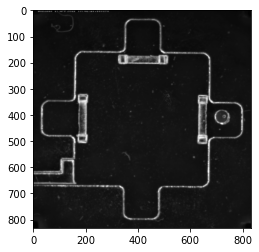

In [13]:
plt.imshow(BackG)

In [15]:
BackG [[[1]]]

/var/folders/3v/_y6xq12x6l96bm2kp__gv6z40000gn/T/ipykernel_3000/489774299.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  BackG [[[1]]]


array([[[7, 7, 7],
        [7, 7, 7],
        [7, 7, 7],
        ...,
        [4, 4, 4],
        [4, 4, 4],
        [4, 4, 4]]], dtype=uint8)

In [16]:
gray = cv2.cvtColor(BackG, cv2.COLOR_BGR2GRAY)

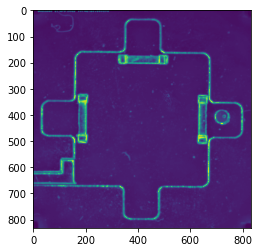

In [17]:
plt.imshow(gray)

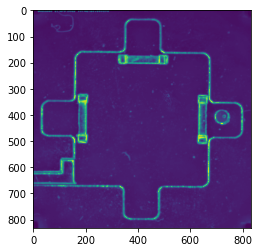

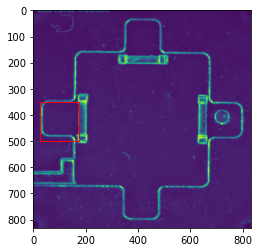

In [26]:
plt.imshow(gray)

# Create figure and axes
fig, ax = plt.subplots(1)

# Display the image
ax.imshow(gray)

# Create a Rectangle patch
rect = patches.Rectangle((25,350),150,150, edgecolor='r', facecolor="none")

# Add the patch to the Axes
ax.add_patch(rect)
plt.show()
#plt.imshow(gray)
#plt.ax.add_patch(rect)
